In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, Callback
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as plt_image
import math
from google.colab import files, drive
%matplotlib inline

import string, re, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from google.colab import drive

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
list_rating_1 = df[df.Rating == 1]
list_rating_2 = df[df.Rating == 2]
list_rating_3 = df[df.Rating == 3]
list_rating_4 = df[df.Rating == 4]
list_rating_5 = df[df.Rating == 5]


In [ ]:
list_rating_1 = list_rating_1[0:1000]
list_rating_2 = list_rating_2[0:1000]
list_rating_3 = list_rating_3[0:1000]
list_rating_4 = list_rating_4[0:1000]
list_rating_5 = list_rating_5[0:1000]

In [ ]:
new_df = pd.concat([list_rating_1, list_rating_2, list_rating_3, list_rating_4, list_rating_5], axis=0)

In [ ]:
new_df = new_df.sample(frac = 1)

In [ ]:
new_df.head(10)

,Review,Rating
2258,great time stayed w jan th sugar bowl game gre...,4
9509,rialto love hate stayed rialto night june crui...,2
1199,fantastic hotel service hotel receives great r...,5
928,hotel rex highly recommended stayed hotel rex ...,5
8279,location nt ebverything loved madrid return da...,2
4536,silly policy children tried book hotel family ...,2
2067,great hotel ok service rc new orleans really n...,4
3301,lots pluses minuses second time stayed caribe ...,4
3155,good crack second week plastered start impress...,2
7800,perfectly adequate room billing screwed spent ...,3


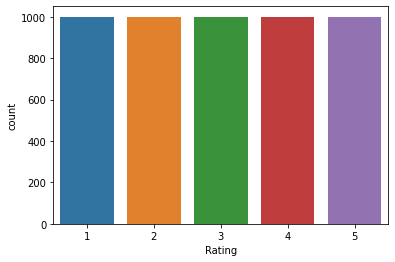

In [ ]:
sns.countplot(x = 'Rating', data = new_df)

In [ ]:
case folding
stopword
stemming
tokenizing


# Remove numbers
def remove_numbers(data):
    return re.sub('[0-9]+','',data)
new_df['Review']=df['Review'].apply(lambda x: remove_numbers(x))

# Remove Punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
new_df['Review']=df['Review'].apply(lambda x: remove_punctuation(x))

# Remove Stop Words
stopword = stopwords.words('english')
def remove_stopwords(text):
    return(' '.join([w for w in text.split() if w not in stopword ]))
new_df.Review = df.Review.apply(lambda x: remove_stopwords(x))

# Word Lemmatizer
lemmatizer = WordNetLemmatizer()
def lem(data):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(data.split())]))
new_df.Review = df.Review.apply(lambda x: lem(x))

new_df.head()

,Review,Rating
2258,great time stayed w jan 1-4th sugar bowl game ...,4
9509,rialto love hate stayed rialto night june 11 c...,2
1199,fantastic hotel service hotel receives great r...,5
928,hotel rex highly recommended stayed hotel rex ...,5
8279,location n't ebverything loved madrid return d...,2


In [ ]:
Rating = pd.get_dummies(new_df.Rating)
new_df = pd.concat([new_df, Rating], axis=1)
new_df = new_df.drop(columns='Rating')
# new_df = new_df[1500:4500]
new_df

,Review,1,2,3,4,5
2258,great time stayed w jan 1-4th sugar bowl game ...,0,0,0,1,0
9509,rialto love hate stayed rialto night june 11 c...,0,1,0,0,0
1199,fantastic hotel service hotel receives great r...,0,0,0,0,1
928,hotel rex highly recommended stayed hotel rex ...,0,0,0,0,1
8279,location n't ebverything loved madrid return d...,0,1,0,0,0
...,...,...,...,...,...,...
3187,pick vacation spot went melia caribe tropical ...,0,1,0,0,0
7497,generic motor hotel holiday inn back-to-back h...,0,0,1,0,0
2757,"terrific week terrific week wife 13 y.o, son b...",0,0,0,1,0
2260,not seeking peace quiet tthis lovely hotel sle...,0,1,0,0,0


In [ ]:
review = new_df['Review'].values
label = new_df[[1, 2, 3, 4, 5]].values


In [ ]:
from sklearn.model_selection import train_test_split

review_train, review_test, label_train, label_test = train_test_split(review, label, test_size=0.2)

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.75 and logs.get('accuracy')>0.75):
      print("\nAkurasi telah mencapai >90%! dan Akurasi validation telah mencapai >75%")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token='-')
tokenizer.fit_on_texts(review_train)
tokenizer.fit_on_texts(review_test)

In [ ]:
sequens_train = tokenizer.texts_to_sequences(review_train)
sequens_test = tokenizer.texts_to_sequences(review_test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

pad_train = pad_sequences(sequens_train)
pad_test = pad_sequences(sequens_test)

In [ ]:
# membuat arsitektur 

import tensorflow as tf

from tensorflow.keras import Sequential

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(100, activation = 'softmax'),
    tf.keras.layers.Dense(5, activation='softmax')
])


model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 100)         5000000   
                                                                 
 spatial_dropout1d_5 (Spatia  (None, None, 100)        0         
 lDropout1D)                                                     
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dense_10 (Dense)            (None, 5)                 505       
                                                                 
Total params: 5,080,905
Trainable params: 5,080,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow import keras

from tensorflow.keras import layers

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# snippet of using the LearningRateScheduler callback
from keras.callbacks import LearningRateScheduler

 
def my_learning_rate(epoch, lrate):
	return lrate
 
lrs = LearningRateScheduler(my_learning_rate)
num_epochs = 10
history = model.fit(pad_train, label_train, epochs=num_epochs, 
                    validation_data=(pad_test, label_test), callbacks=[lrs])

Epoch 1/10
125/125 [==============================] - 167s 1s/step - loss: 1.6079 - accuracy: 0.2125 - val_loss: 1.5748 - val_accuracy: 0.2740 - lr: 0.0100
Epoch 2/10
125/125 [==============================] - 166s 1s/step - loss: 1.3755 - accuracy: 0.3817 - val_loss: 1.3781 - val_accuracy: 0.3800 - lr: 0.0100
Epoch 3/10
125/125 [==============================] - 165s 1s/step - loss: 1.1640 - accuracy: 0.4715 - val_loss: 1.3749 - val_accuracy: 0.3860 - lr: 0.0100
Epoch 4/10
125/125 [==============================] - 165s 1s/step - loss: 1.0263 - accuracy: 0.5207 - val_loss: 1.3923 - val_accuracy: 0.3870 - lr: 0.0100
Epoch 5/10
125/125 [==============================] - 169s 1s/step - loss: 0.9259 - accuracy: 0.5648 - val_loss: 1.4828 - val_accuracy: 0.4040 - lr: 0.0100
Epoch 6/10
125/125 [==============================] - 166s 1s/step - loss: 0.8435 - accuracy: 0.5980 - val_loss: 1.5208 - val_accuracy: 0.4080 - lr: 0.0100
Epoch 7/10
125/125 [==============================] - 166s 1s/st

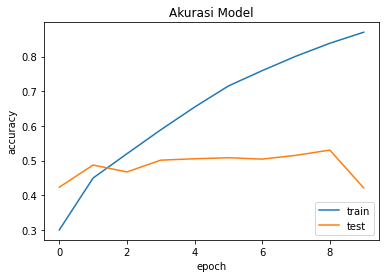

In [ ]:
# Plot akurasi model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

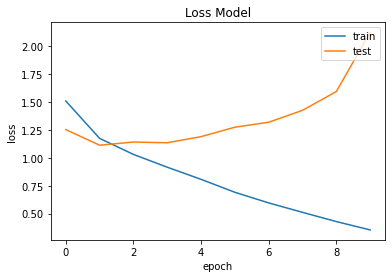

In [ ]:
# Plot loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()